# Assignment 12: Seaborn 
### Relational, Distributional, Categorical and Multi-Plots
- Author: Nihit Kumar
- Created: 2026-02-28

[Assignment Source Link](https://docs.google.com/document/d/1s3qALl29_RGUuX2xgrPla2JDDY-sAvsg89esNPBcCWg/edit?tab=t.0)

***

> **Importing required libraries and datasets**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl

In [11]:
student = pd.read_csv('student_data.csv')   # Student performance data
sales = pd.read_csv('sales_data.csv')       # Sales data
insurance = pd.read_csv('insurance.csv')    # Insurance data
home = pd.read_csv('home_data.csv')         # House data
customer = pd.read_csv('customer_data.csv') # E-commerce data    

> **Task 1: Relational Plot**

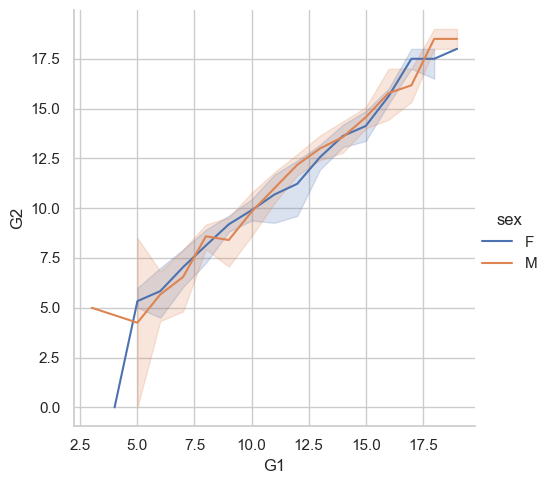

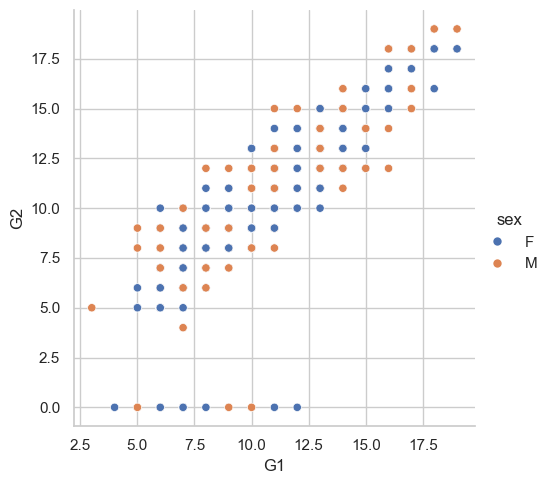

In [3]:
# Task 1: Relational Plot
sns.set_theme(style="whitegrid")
# Relational plot using two numerical columns and a categorical hue
sns.relplot(data=student, x="G1", y="G2", hue="sex", kind="line", markers=True, dashes=False)
plt.show()
# Same relationship using scatter style
sns.relplot(data=student, x="G1", y="G2", hue="sex", kind="scatter")
plt.show()


> **Task 2: Line Plot as Scatter and Facet**

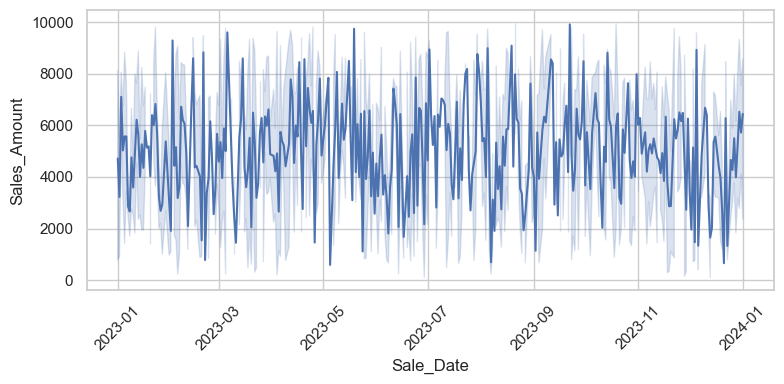

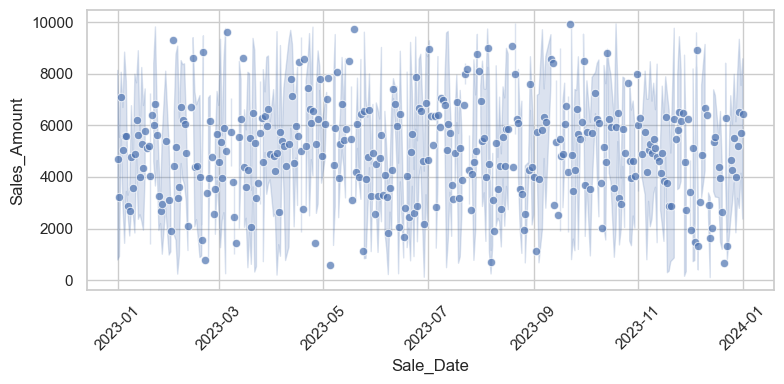

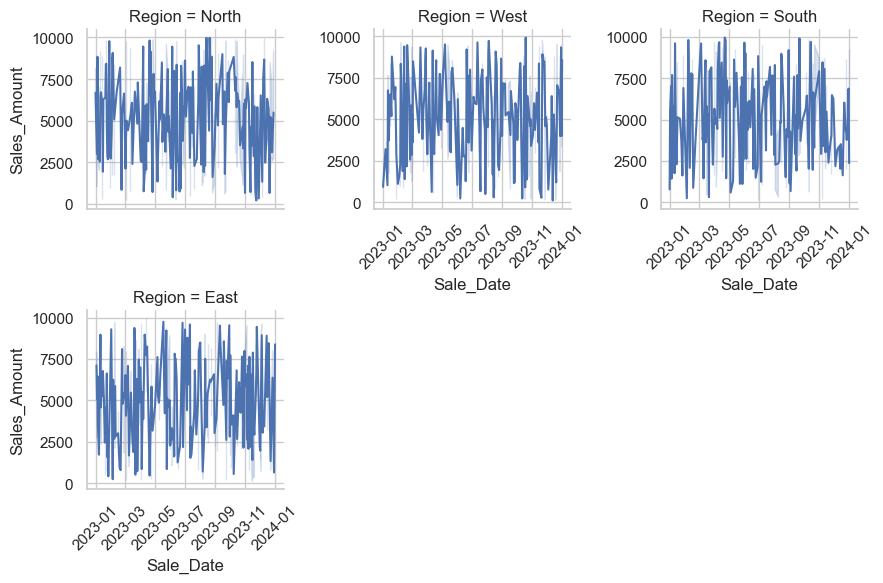

In [4]:
# Task 2: Line Plot as Scatter & Facet
sns.set_theme(style="whitegrid")
# Prepare date column for time-series plotting
sales_dt = sales.copy()
sales_dt["Sale_Date"] = pd.to_datetime(sales_dt["Sale_Date"])
# Line plot
plt.figure(figsize=(8, 4))
sns.lineplot(data=sales_dt, x="Sale_Date", y="Sales_Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Scatter-style line plot (markers only)
plt.figure(figsize=(8, 4))
sns.lineplot(data=sales_dt, x="Sale_Date", y="Sales_Amount", marker="o", linestyle="", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Faceting by a categorical column
facet = sns.relplot(
    data=sales_dt,
    x="Sale_Date",
    y="Sales_Amount",
    kind="line",
    col="Region",
    col_wrap=3,
    height=3,
    facet_kws={"sharey": False}
)
for ax in facet.axes.flat:
    ax.tick_params(axis="x", rotation=45)
plt.tight_layout()
plt.show()


> **Distribution Plot**

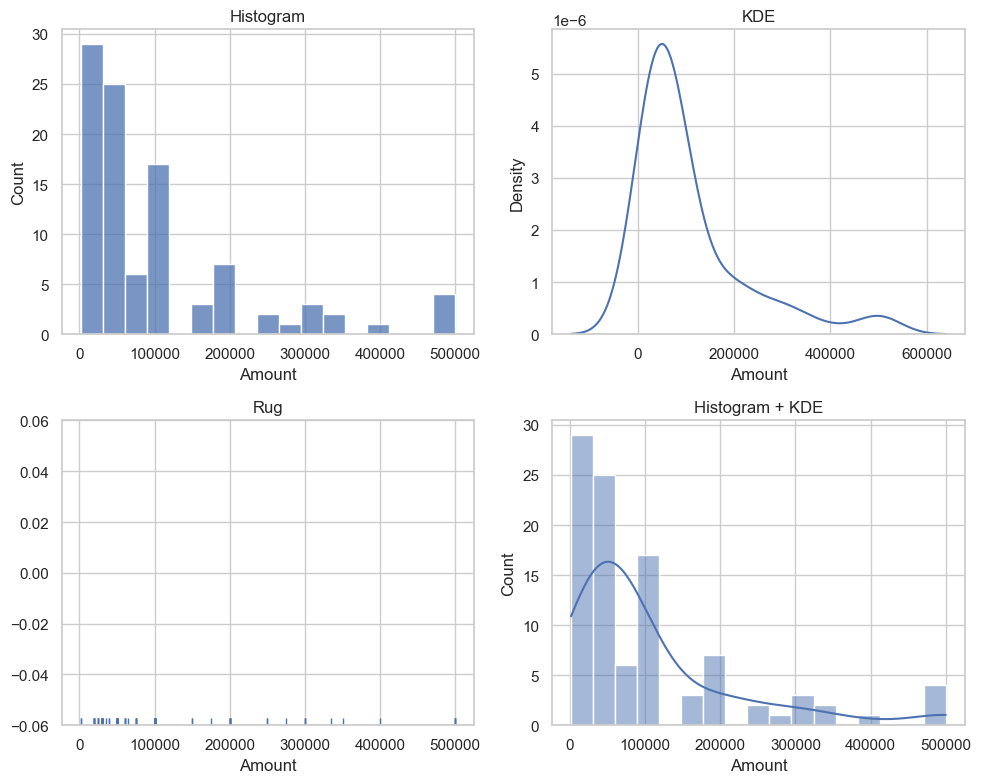

In [5]:
# Task 3: Distribution Plots
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# Histogram
sns.histplot(data=insurance, x="Amount", ax=axes[0, 0])
axes[0, 0].set_title("Histogram")
# KDE plot
sns.kdeplot(data=insurance, x="Amount", ax=axes[0, 1])
axes[0, 1].set_title("KDE")
# Rug plot
sns.rugplot(data=insurance, x="Amount", ax=axes[1, 0])
axes[1, 0].set_title("Rug")
# Histogram + KDE
sns.histplot(data=insurance, x="Amount", kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Histogram + KDE")
plt.tight_layout()
plt.show()


> **Bivariate Distribution Plots**

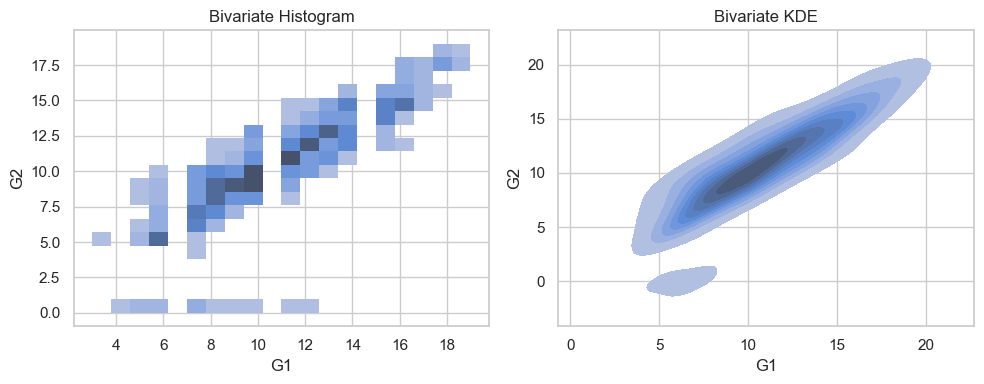

In [6]:
# Task 4: Bivariate Distribution Plots
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Bivariate histogram
sns.histplot(data=student, x="G1", y="G2", bins=20, pmax=0.9, ax=axes[0])
axes[0].set_title("Bivariate Histogram")
# Bivariate KDE plot
sns.kdeplot(data=student, x="G1", y="G2", fill=True, thresh=0.05, ax=axes[1])
axes[1].set_title("Bivariate KDE")
plt.tight_layout()
plt.show()


> **Task 5: Matrix Plots**

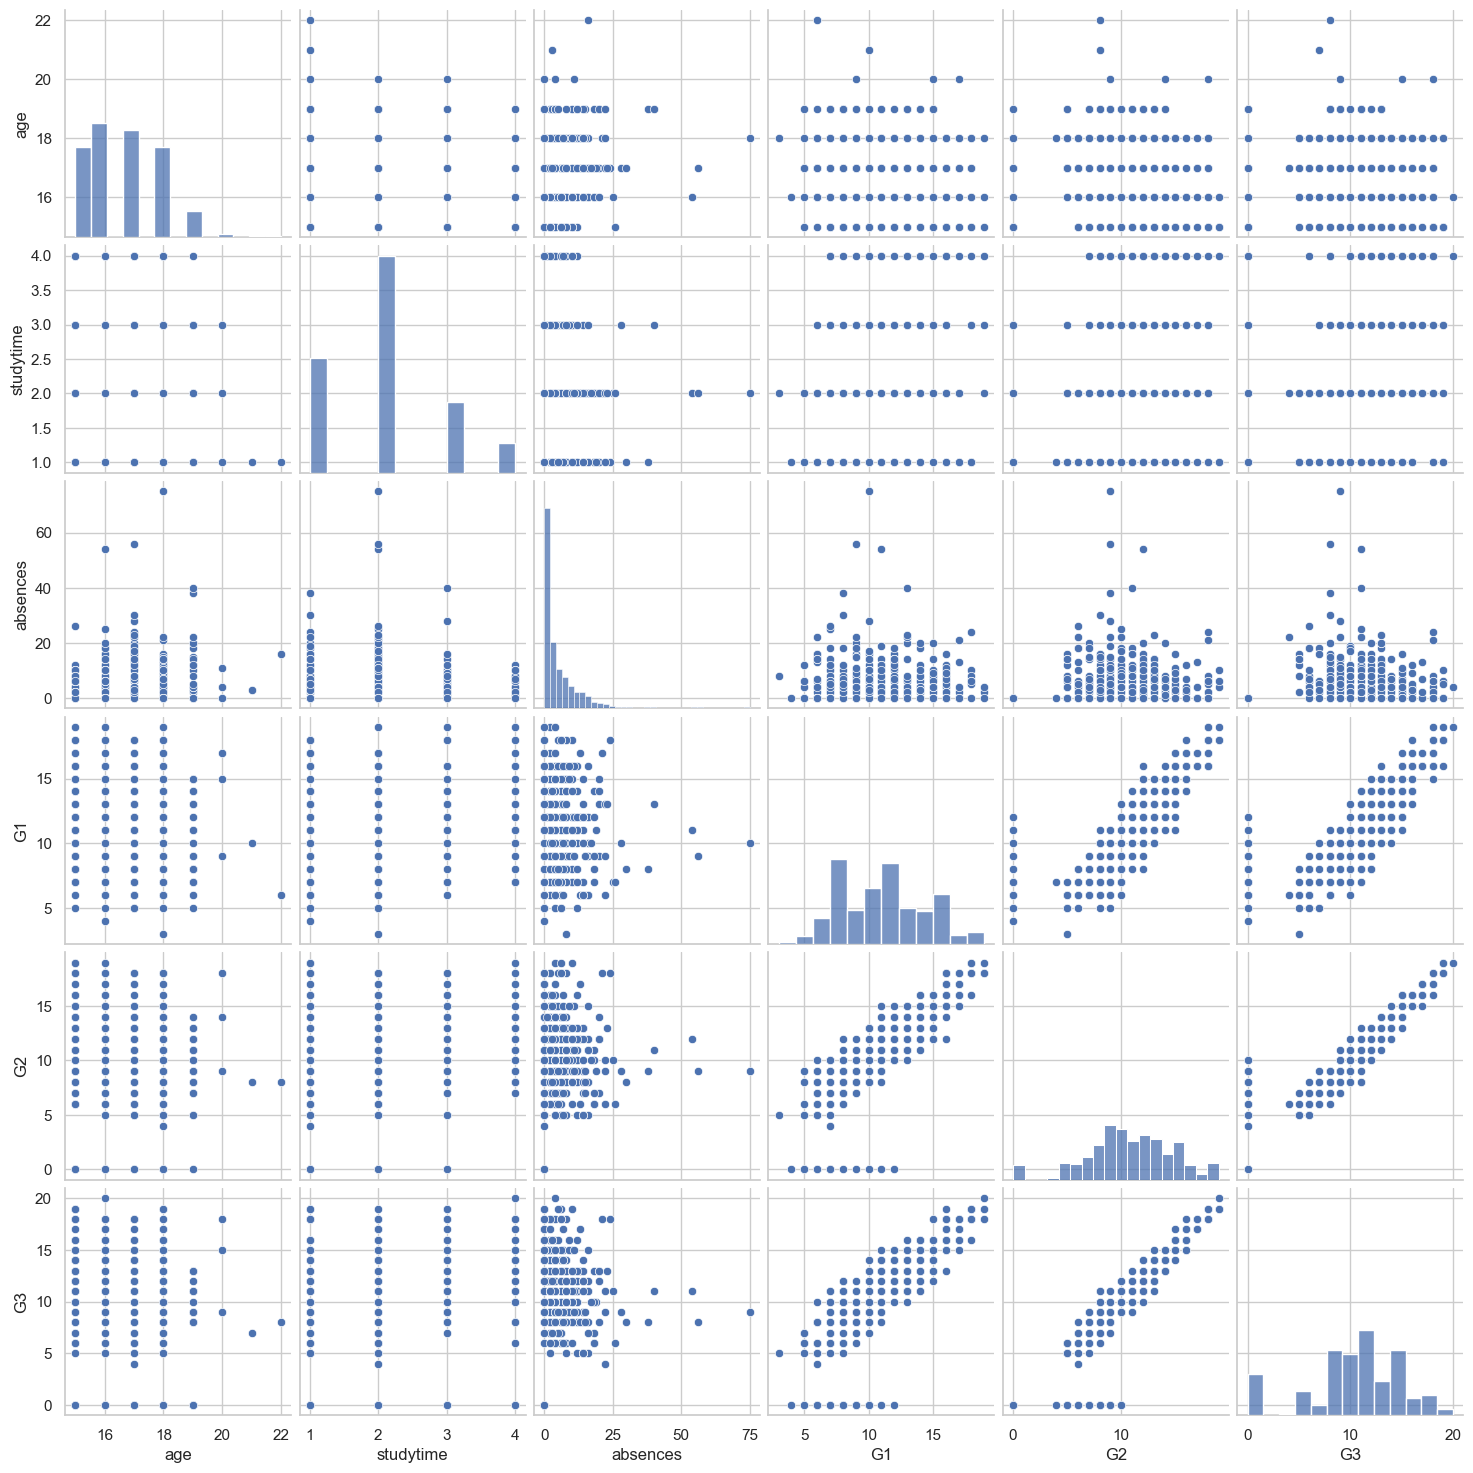

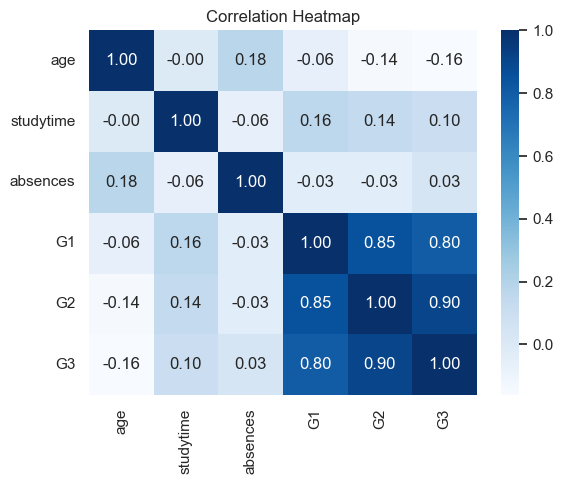

In [7]:
# Task 5: Matrix Plots
sns.set_theme(style="whitegrid")
# Pair plot with selected numerical columns
num_cols = ["age", "studytime", "absences", "G1", "G2", "G3"]
sns.pairplot(student[num_cols])
plt.show()
# Correlation heatmap
corr = student[num_cols].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


> **Task 6: Categorical Plots**

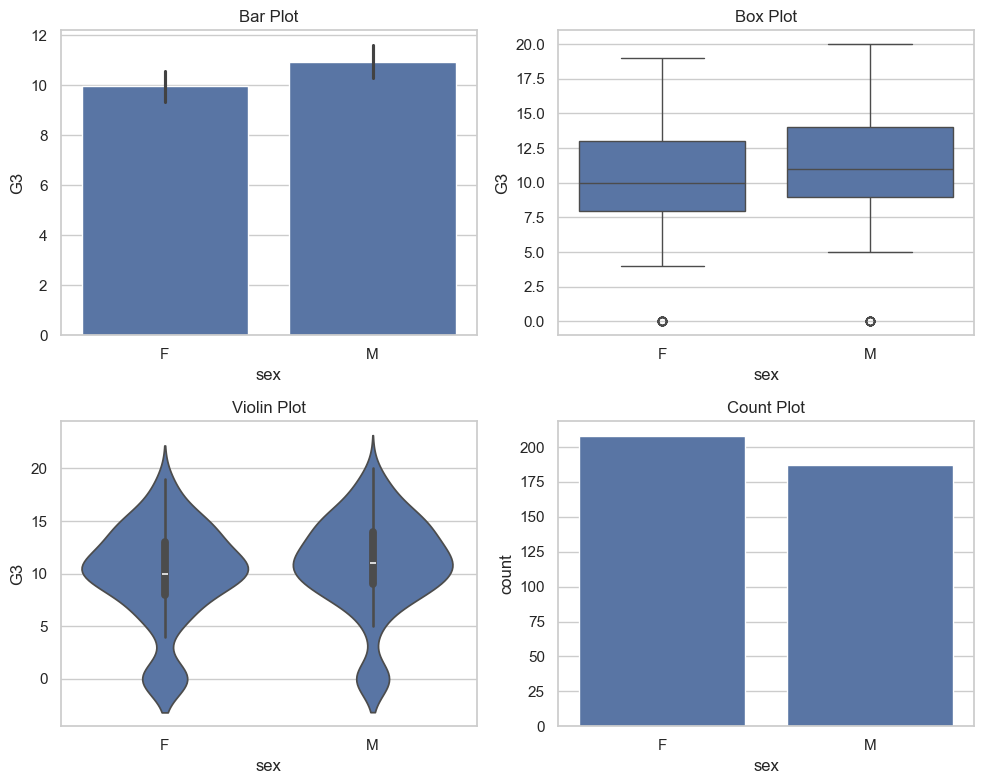

In [8]:
# Task 6: Categorical Plots
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
# Bar plot (mean of numerical column by category)
sns.barplot(data=student, x="sex", y="G3", ax=axes[0, 0])
axes[0, 0].set_title("Bar Plot")
# Box plot
sns.boxplot(data=student, x="sex", y="G3", ax=axes[0, 1])
axes[0, 1].set_title("Box Plot")
# Violin plot
sns.violinplot(data=student, x="sex", y="G3", ax=axes[1, 0])
axes[1, 0].set_title("Violin Plot")
# Count plot
sns.countplot(data=student, x="sex", ax=axes[1, 1])
axes[1, 1].set_title("Count Plot")
plt.tight_layout()
plt.show()


> **Task 7: Regression Plots**

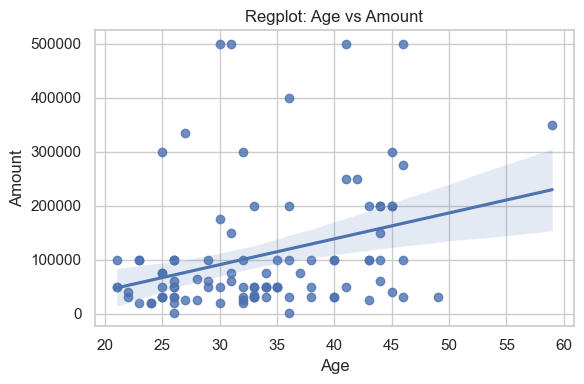

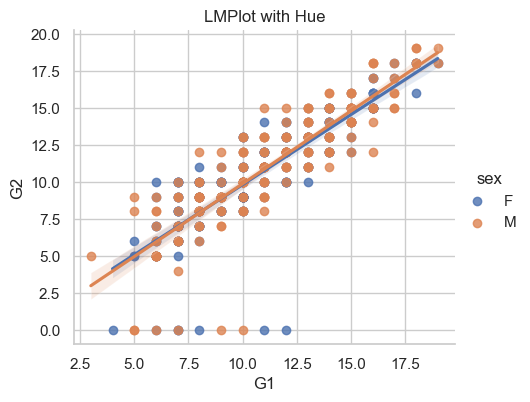

In [9]:
# Task 7: Regression Plots
sns.set_theme(style="whitegrid")
# Regression plot between two numerical columns
plt.figure(figsize=(6, 4))
sns.regplot(data=insurance, x="Age", y="Amount")
plt.title("Regplot: Age vs Amount")
plt.tight_layout()
plt.show()
# lmplot with hue using a categorical column
sns.lmplot(data=student, x="G1", y="G2", hue="sex", height=4, aspect=1.2)
plt.title("LMPlot with Hue")
plt.show()


> **Task 8: Multi-plots & Figure Level plots**

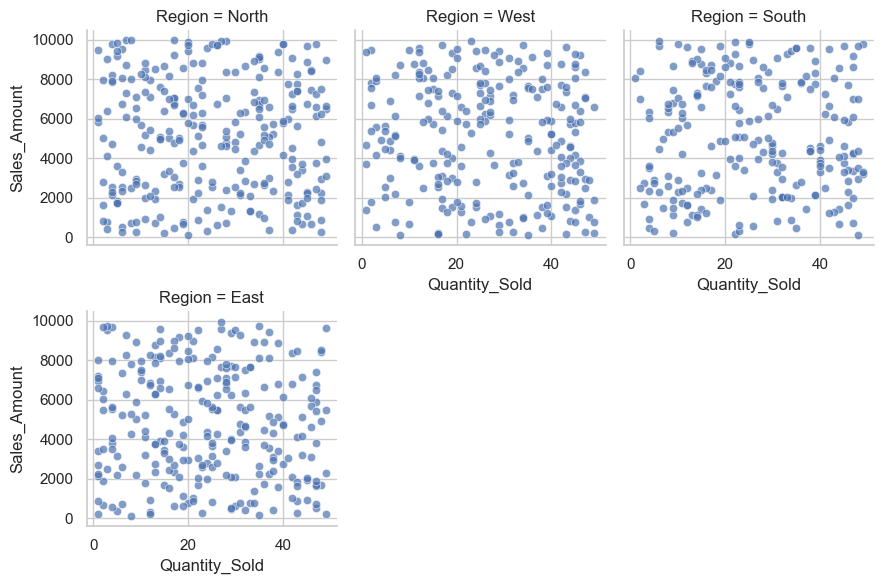

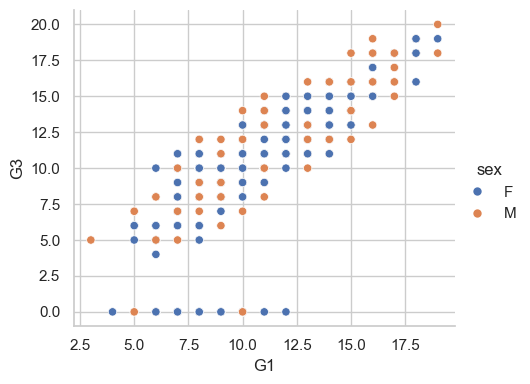

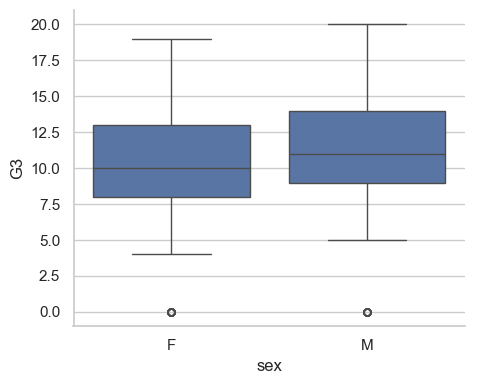

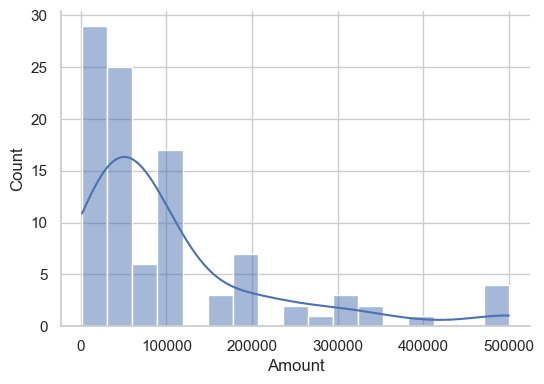

In [10]:
# Task 8: Multi-Plots & Figure-Level Plots
sns.set_theme(style="whitegrid")
# FacetGrid with numerical x/y and categorical split
facet_grid = sns.FacetGrid(sales, col="Region", col_wrap=3, height=3)
facet_grid.map_dataframe(sns.scatterplot, x="Quantity_Sold", y="Sales_Amount", alpha=0.7)
facet_grid.set_axis_labels("Quantity_Sold", "Sales_Amount")
plt.show()
# Multi-plot dashboard using relplot, catplot, displot
sns.relplot(data=student, x="G1", y="G3", hue="sex", kind="scatter", height=4, aspect=1.2)
plt.show()
sns.catplot(data=student, x="sex", y="G3", kind="box", height=4, aspect=1.2)
plt.show()
sns.displot(data=insurance, x="Amount", kde=True, height=4, aspect=1.4)
plt.show()
